 | xmin | xmax | n  | a1  | a2  | a3   | c1  | c2   | s   |
 | ---  | ---  | ---  | ---  | ---  | ---  | ---  | ---  | --- |
 | -0.7 | 0.7  | 38 | 0.6 | -3.1| -1.7 | 1.3 | -2.1 | 1.3 | 

In [1]:
clc
clear --all
pkg load statistics
graphics_toolkit("gnuplot")


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update it's internal list of open figure windows.
We recommend using the qt toolkit instead.


In [2]:
global figure_number = 1;
x_min = -0.7;
x_max = 0.7;
n = 38;
s = 1.3;
c = [1.3, -2.1];
a = [0.6, -3.1, -1.7];

In [3]:
function linear_function(x_min, x_max, n, s, c)
    global figure_number;
    X = linspace(x_min, x_max, n)';
    i = 1:2;
    A(:, i) = X .^ (i - 1);
    y = A * c';
    Z = normrnd(0, s, n, 1);
    Y = y + Z;
    
    function_c = polyfit(X, Y, 1);
    matrix_c = (A' * A)^-1 * A' * Y;
    cov_xy = X' * Y / n - mean(X) * mean(Y);
    var_x = X' * X / n - (mean(X))^2;
    cov_theta = [mean(Y) - cov_xy / var_x * mean(X); cov_xy / var_x];

    printf("Function: y = %gx + %g\n ---\n",
            c(2), c(1))
    printf("Built-in func: \t%f \t%f\n",
            function_c(1), function_c(2));
    printf("Matrix: \t%f \t%f\n",
            matrix_c(2), matrix_c(1));
    printf("Covariation: \t%f \t%f \n ---\n",
            cov_theta(2), cov_theta(1));
    
    Y_matrix = A * matrix_c;
    Y_function = polyval(function_c, X);
    
    f = figure(figure_number++, "position", get(0, "screensize"));
    plot(X, Y, '.', X, Y_function, '+', X, Y_matrix, 'o', X, y, '-');
    legend("Selection", "Octave functions", "Matrix method", "Function");
    axis("tight");

    r = Y_matrix - Y;
    printf("Ortogonality: %d\n", r' * Y_matrix);
    sigma_n = sqrt(r' * r / (n - 3));
    printf("Noise evaluation: %f\n", sigma_n);
    pause(0.01)
end

Function: y = -2.1x + 1.3
 ---
Built-in func: 	-2.235570 	1.277263
Matrix: 	-2.235570 	1.277263
Covariation: 	-2.235570 	1.277263 
 ---
Ortogonality: 2.69699e-15
Noise evaluation: 1.135471


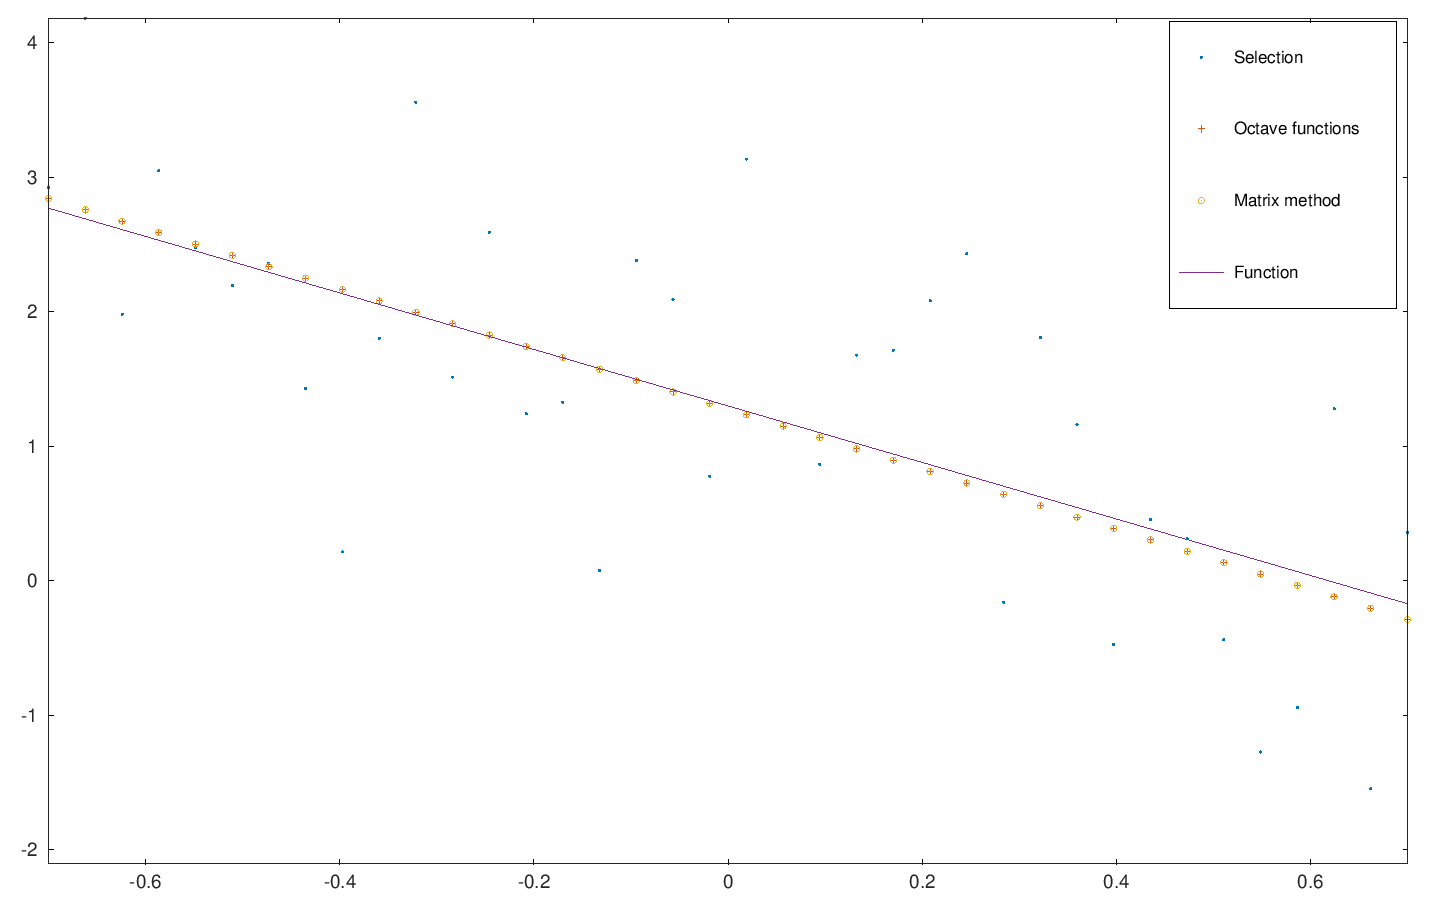

In [4]:
linear_function(x_min, x_max, n, s, c)

In [5]:
function quadratic_function(x_min, x_max, n, s, c)
    global figure_number;
    X = linspace(x_min, x_max, n)';
    i = 1:3;
    A(:, i) = X .^ (i - 1);
    y = A * c';
    Z = normrnd(0, s, n, 1);
    Y = y + Z;
    
    function_c = polyfit(X, Y, 2);
    matrix_c = (A' * A)^-1 * A' * Y;
    cov_xy = X' * Y / n - mean(X) * mean(Y);
    var_x = X' * X / n - (mean(X))^2;

    printf("Function: y = %gx^2 + %gx + %g\n ---\n",
            c(3), c(2), c(1))
    printf("Built-in func: \t%f \t%f \t%f\n",
            function_c(1), function_c(2), function_c(3));
    printf("Matrix: \t%f \t%f \t%f \n ---\n",
            matrix_c(3), matrix_c(2), matrix_c(1));

    Y_matrix = A * matrix_c;
    Y_function = polyval(function_c, X);
    
    f = figure(figure_number++, "position", get(0, "screensize"));
    plot(X, Y, '.', X, Y_function, '+', X, Y_matrix, 'o', X, y, '-');
    legend("Selection", "Octave functions", "Matrix method", "Function");
    axis("tight");

    r = Y_matrix - Y;
    printf("Ortogonality: %d\n", r' * Y_matrix);
    sigma_n = sqrt(r' * r / (n - 3));
    printf("Noise evaluation: %f\n", sigma_n);
    pause(0.01)
end

Function: y = -1.7x^2 + -3.1x + 0.6
 ---
Built-in func: 	-1.078673 	-3.518573 	0.575472
Matrix: 	-1.078673 	-3.518573 	0.575472 
 ---
Ortogonality: 7.23554e-15
Noise evaluation: 1.231777


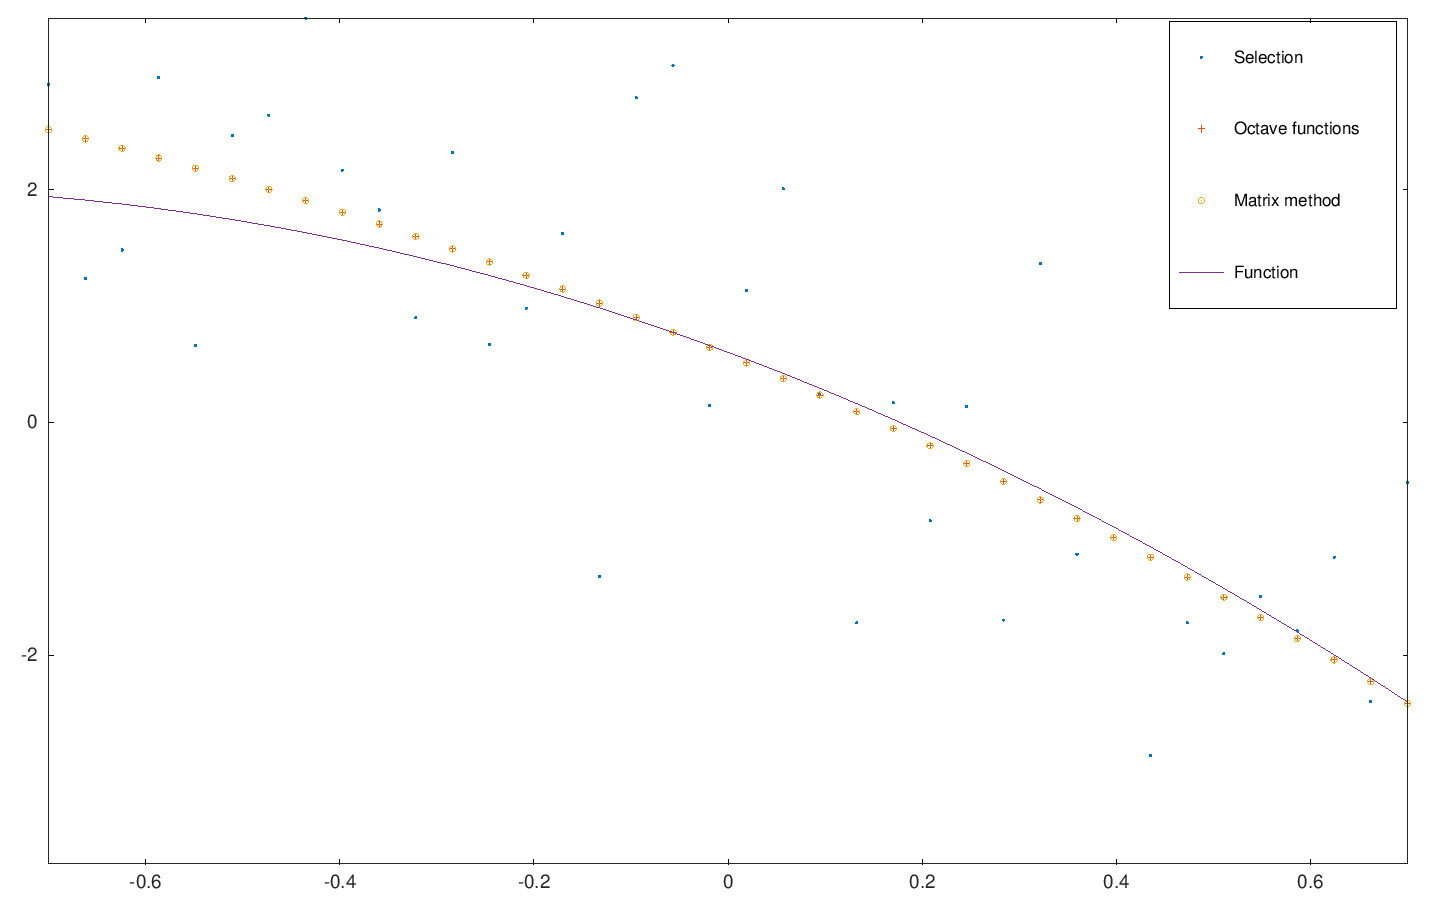

In [6]:
quadratic_function(x_min, x_max, n, s, a)

**Выводы**:
- Полученные параметры обоих функций близки к исходным
- Значения коэффицентов из встроенных функций равны результатам, полученных через матричные функции
- Ортогональность выполняется в обоих случаях
- Оценка уровня шума очень близка с реальным показателем